<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/clase_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de Decisión

Los **árboles de decisión** son modelos de *machine learning
supervisado* que se utilizan tanto para **clasificación** como para
**regresión**.

Su funcionamiento se basa en dividir el espacio de características en
regiones más pequeñas mediante **preguntas secuenciales** sobre los
datos. El resultado es una estructura en forma de árbol.

------------------------------------------------------------------------

## Definición

Un **árbol de decisión** es un modelo predictivo en forma de estructura
jerárquica, donde:

-   Cada **nodo interno** representa una condición o prueba sobre un
    atributo (ejemplo: *¿Edad \< 30?*).
-   Cada **rama** representa el resultado de esa condición (*Sí / No*).
-   Cada **nodo hoja** representa una salida final (una clase en
    clasificación, o un valor numérico en regresión).

------------------------------------------------------------------------

## Partes de un Árbol de Decisión

1.  **Raíz (Root Node):**
    -   Nodo inicial del árbol.\
    -   Contiene todo el conjunto de datos.\
    -   Primera pregunta/condición que divide la información.
2.  **Nodos Internos (Decision Nodes):**
    -   Representan decisiones basadas en una característica.\
    -   Dividen los datos en subconjuntos más homogéneos.
3.  **Ramas (Branches):**
    -   Conexiones entre nodos.\
    -   Representan el resultado de la prueba en el nodo padre.
4.  **Hojas (Leaf Nodes):**
    -   Representan la **predicción final**.\
    -   Pueden ser:
        -   **Clasificación:** Una categoría (ej. *Spam / No Spam*).\
        -   **Regresión:** Un valor numérico (ej. *Precio estimado =
            200,000*).

------------------------------------------------------------------------

## Funcionamiento del Árbol

1.  Se selecciona la **característica más informativa** (usando métricas
    como **Gini**, **Entropía**, o **MSE** en regresión).\
2.  Se divide el dataset en función de esa característica.\
3.  El proceso se repite recursivamente hasta llegar a condiciones de
    parada (profundidad máxima, mínimo número de muestras, etc.).\
4.  El modelo se representa como un conjunto de reglas **IF--THEN**
    fáciles de interpretar.

------------------------------------------------------------------------

## Árboles de Clasificación

Se usan cuando la variable de salida es **categórica**.\
Ejemplo: *Predecir si un cliente comprará o no un producto*.

**Métricas usadas:** - **Índice Gini** - **Entropía / Ganancia de
información**

Ejemplo en Python:

``` python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dataset de ejemplo
X, y = load_iris(return_X_y=True)

# Modelo de árbol de clasificación
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X, y)

# Visualización
plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()
```

------------------------------------------------------------------------

## Árboles de Regresión

Se usan cuando la variable de salida es **numérica continua**.\
Ejemplo: *Predecir el precio de una casa*.

**Métricas usadas:** - **MSE (Mean Squared Error)** - **MAE (Mean
Absolute Error)**

Ejemplo en Python:

``` python
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Dataset de ejemplo
X, y = fetch_california_housing(return_X_y=True)

# Modelo de árbol de regresión
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X, y)

# Visualización
plt.figure(figsize=(12,6))
plot_tree(reg, filled=True, feature_names=fetch_california_housing().feature_names)
plt.show()
```

------------------------------------------------------------------------

## Librerías en Python

-   **scikit-learn** → Implementa `DecisionTreeClassifier` y
    `DecisionTreeRegressor`.\
-   **XGBoost** → Usa árboles como base para boosting.\
-   **LightGBM** → Optimizado para datasets grandes.\
-   **CatBoost** → Maneja automáticamente variables categóricas.

------------------------------------------------------------------------

## Ventajas

-   Fácil de entender e interpretar.\
-   Requieren poca preparación de datos (no necesitan normalización).\
-   Funcionan con variables categóricas y numéricas.

------------------------------------------------------------------------

## Desventajas

-   Propensos al **sobreajuste (overfitting)**.\
-   Sensibles a pequeñas variaciones en los datos.\
-   Pueden generar árboles muy grandes y complejos.

------------------------------------------------------------------------

En resumen, los **árboles de decisión** son modelos versátiles y fáciles
de interpretar, utilizados como base en algoritmos más avanzados como
**Random Forests** y **Gradient Boosting**.


In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=200,          # Number of samples
    n_features=2,           # Number of features (house size, income)
    n_informative=2,        # All features are informative
    n_redundant=0,          # No redundant features
    n_clusters_per_class=1, # One cluster per class
    flip_y=0.05,            # A small amount of noise
    random_state=42         # For reproducibility
)

# Create a pandas DataFrame
df = pd.DataFrame(X, columns=['Tamaño de vivienda', 'Ingresos'])
df['Tipo de ocupante'] = y

# Map the target variable to meaningful labels
df['Tipo de ocupante'] = df['Tipo de ocupante'].map({0: 'Inquilino', 1: 'Dueño'})

# Display the first few rows
display(df.head())

,Tamaño de vivienda,Ingresos,Tipo de ocupante
0,-0.499968,2.068512,Dueño
1,1.826101,1.967345,Dueño
2,-0.099865,-1.766919,Inquilino
3,2.038911,-0.479952,Inquilino
4,-0.464201,-0.721315,Inquilino


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Preparar los datos
X = df[['Tamaño de vivienda', 'Ingresos']]
y = df['Tipo de ocupante']

# Dividir el dataset (opcional para este caso, pero buena práctica)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el árbol de decisión
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

print("Modelo de árbol de decisión entrenado.")

Modelo de árbol de decisión entrenado.


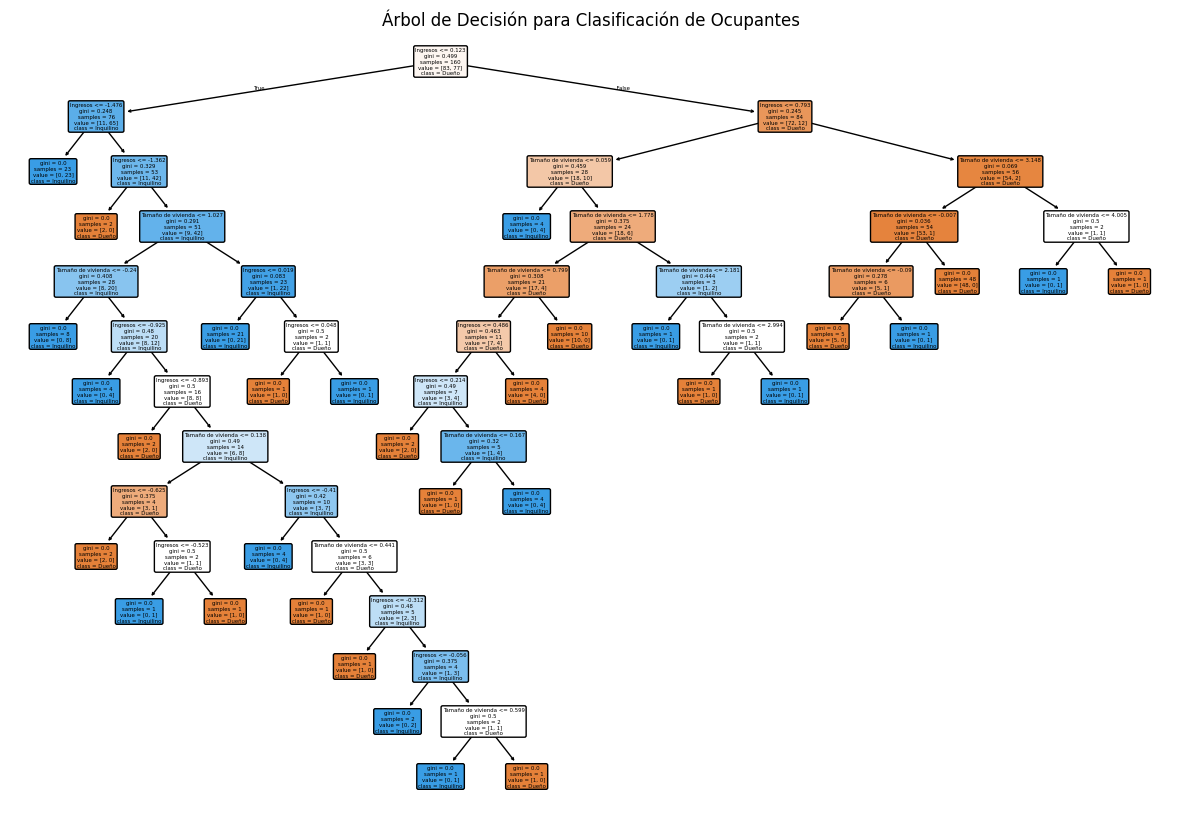

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, feature_names=X.columns, class_names=tree_classifier.classes_, filled=True, rounded=True)
plt.title("Árbol de Decisión para Clasificación de Ocupantes")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


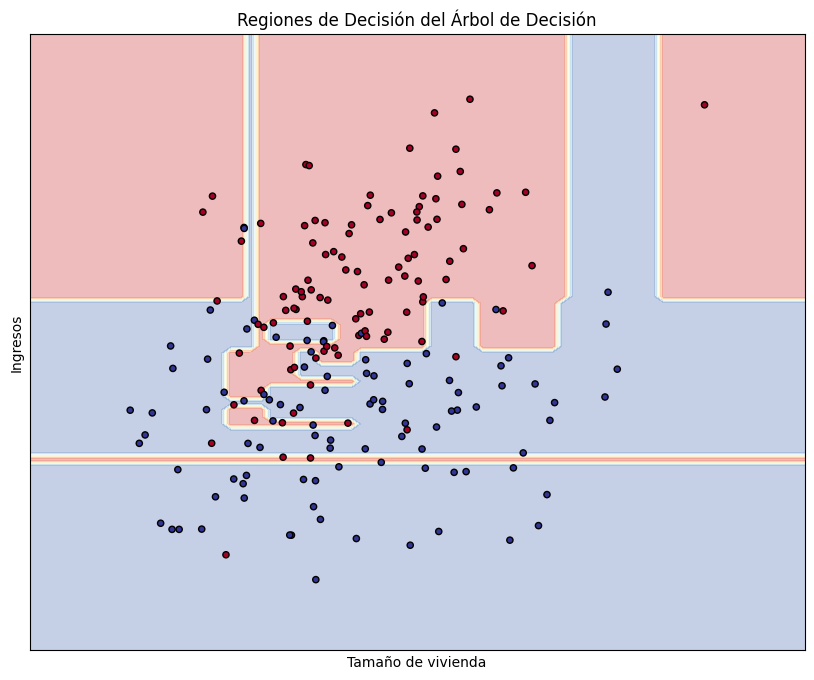

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the boundaries of the plot
x_min, x_max = X['Tamaño de vivienda'].min() - 1, X['Tamaño de vivienda'].max() + 1
y_min, y_max = X['Ingresos'].min() - 1, X['Ingresos'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions for each point in the meshgrid
Z = tree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Map class names to numerical values for contourf
class_names = tree_classifier.classes_
class_map = {name: i for i, name in enumerate(class_names)}
Z_numeric = np.array([class_map[label] for label in Z.ravel()]).reshape(xx.shape)


# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X['Tamaño de vivienda'], X['Ingresos'], c=[class_map[label] for label in y],
            edgecolor='k', s=20, cmap=plt.cm.RdYlBu)

plt.title("Regiones de Decisión del Árbol de Decisión")
plt.xlabel("Tamaño de vivienda")
plt.ylabel("Ingresos")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Pueden vrevisar https://bradleyboehmke.github.io/HOML/DT.html

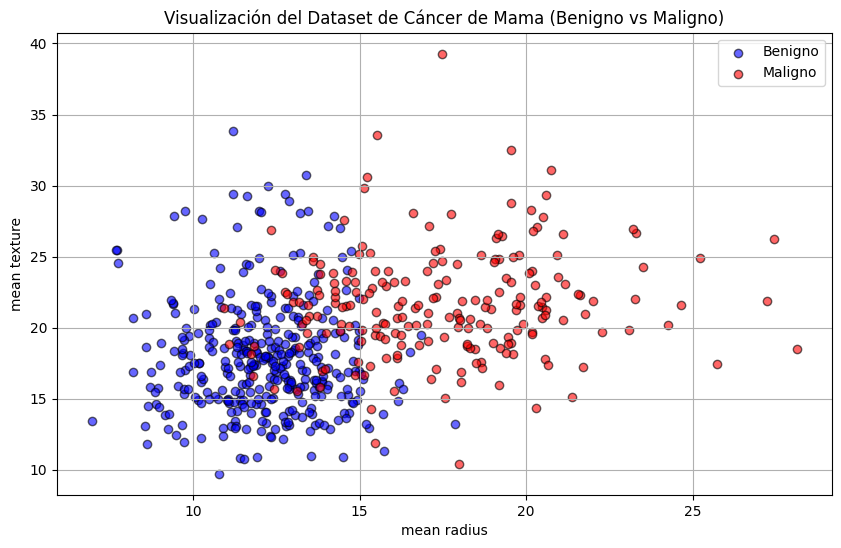

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Maligno


In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset de cáncer de mama
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')

# Crear un DataFrame combinado para facilitar la visualización
df_cancer = pd.concat([X, y], axis=1)

# Mapear los valores numéricos de la etiqueta a nombres de clases
df_cancer['target'] = df_cancer['target'].map({0: 'Maligno', 1: 'Benigno'})

# Seleccionar dos características para visualizar (por ejemplo, mean radius y mean texture)
feature1 = 'mean radius'
feature2 = 'mean texture'

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Graficar puntos para cada clase
for target_name, color in zip(['Benigno', 'Maligno'], ['blue', 'red']):
    subset = df_cancer[df_cancer['target'] == target_name]
    plt.scatter(subset[feature1], subset[feature2], label=target_name,
                c=color, edgecolor='k', alpha=0.6)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Visualización del Dataset de Cáncer de Mama (Benigno vs Maligno)')
plt.legend()
plt.grid(True)
plt.show()

display(df_cancer.head())

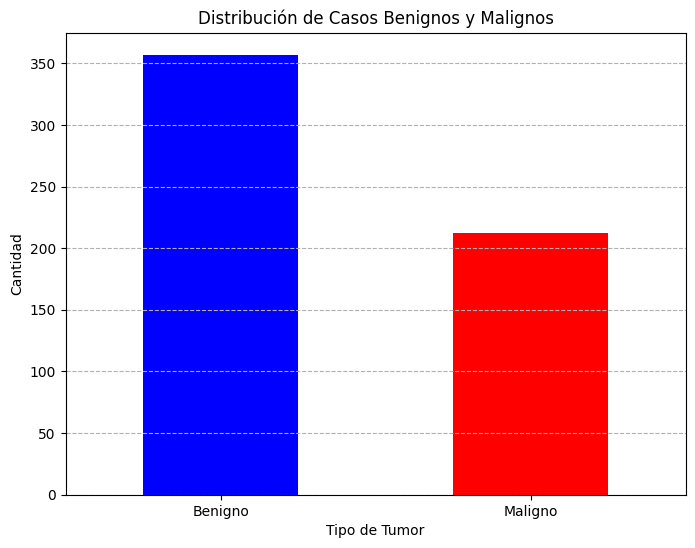

In [6]:
import matplotlib.pyplot as plt

# Contar la cantidad de casos benignos y malignos
class_counts = df_cancer['target'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'red'])

plt.title('Distribución de Casos Benignos y Malignos')
plt.xlabel('Tipo de Tumor')
plt.ylabel('Cantidad')
plt.xticks(rotation=0) # Rota las etiquetas del eje x si es necesario
plt.grid(axis='y', linestyle='--')
plt.show()

In [7]:
import pandas as pd

df = pd.read_csv('data_titanic_2.csv', header='infer')

In [8]:
df

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,0
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,1
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,1
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1
4,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,0
885,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
886,False,True,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,0
887,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Embarked_Q        889 non-null    bool 
 1   Embarked_S        889 non-null    bool 
 2   Sex_male          889 non-null    bool 
 3   Parch_1           889 non-null    bool 
 4   Parch_2           889 non-null    bool 
 5   Parch_3           889 non-null    bool 
 6   Parch_4           889 non-null    bool 
 7   Parch_5           889 non-null    bool 
 8   Parch_6           889 non-null    bool 
 9   SibSp_1           889 non-null    bool 
 10  SibSp_2           889 non-null    bool 
 11  SibSp_3           889 non-null    bool 
 12  SibSp_4           889 non-null    bool 
 13  SibSp_5           889 non-null    bool 
 14  SibSp_8           889 non-null    bool 
 15  Pclass_2          889 non-null    bool 
 16  Pclass_3          889 non-null    bool 
 17  Age_(21.0, 30.0]  889 non-null    b

In [10]:
df.shape

(889, 21)

In [11]:
df.isnull().sum()

,0
Embarked_Q,0
Embarked_S,0
Sex_male,0
Parch_1,0
Parch_2,0
Parch_3,0
Parch_4,0
Parch_5,0
Parch_6,0
SibSp_1,0


In [12]:
X = df.drop(columns=['Survived'])
y = df.Survived

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [27]:
pred_y = model.predict(X_test)
pred_y

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1])

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, pred_y))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       158
           1       0.79      0.63      0.70       109

    accuracy                           0.78       267
   macro avg       0.79      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



In [18]:
confusion_matrix(Y_test, pred_y)

array([[140,  18],
       [ 40,  69]])

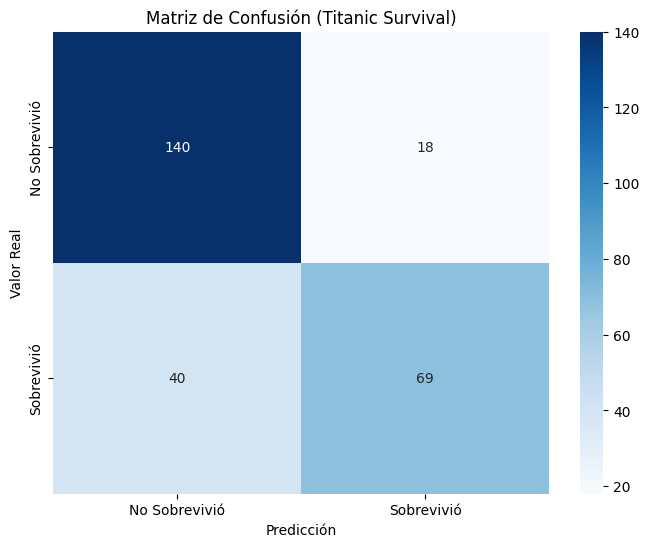

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(Y_test, pred_y)

# Create a more detailed confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Titanic Survival)')
plt.show()

# Métricas de Evaluación en Clasificación

En problemas de **machine learning supervisado** (especialmente clasificación), se utilizan métricas derivadas de la **matriz de confusión**, que resume el desempeño del modelo:

|                     | Predicción Positiva | Predicción Negativa |
|---------------------|----------------------|----------------------|
| **Real Positiva**   | Verdaderos Positivos (TP) | Falsos Negativos (FN) |
| **Real Negativa**   | Falsos Positivos (FP) | Verdaderos Negativos (TN) |

---

## 1. Accuracy (Exactitud)

La proporción de predicciones correctas sobre el total de predicciones:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

---



In [20]:
(140+69)/(140+18+40+69)

0.7827715355805244

## 2. Precision (Precisión)

De todas las predicciones positivas, cuántas son realmente positivas:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

---


In [23]:
precision = 69/( 69+18)
precision

0.7931034482758621


## 3. Recall (Sensibilidad o Exhaustividad)

De todos los positivos reales, cuántos fueron correctamente identificados:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

---

In [24]:
recall = 69/(69+40)
recall

0.6330275229357798



## 4. F1-Score

Media armónica entre precisión y recall:

$$
\text{F1-Score} = \frac{2 \cdot (Precision \cdot Recall)}{Precision + Recall}
$$


In [25]:
2*(precision*recall)/(precision+recall)

0.7040816326530613

In [26]:
2*((69/( 69+18))*(69/(69+40)))/((69/( 69+18))+(69/(69+40)))

0.7040816326530613

In [28]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs = -1)        # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train, Y_train);
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [31]:
print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best depth : 3
Tree best min_samples_leaf : 23
Tree best max_leaf_nodes : 6


In [32]:
DTC_best = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train, Y_train);
Y_pred = DTC_best.predict(X_test)


In [33]:
classification_report(Y_test, Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.97      0.87       158\n           1       0.94      0.60      0.73       109\n\n    accuracy                           0.82       267\n   macro avg       0.86      0.79      0.80       267\nweighted avg       0.84      0.82      0.81       267\n'

In [35]:
confusion_matrix(Y_test, Y_pred)

array([[154,   4],
       [ 44,  65]])

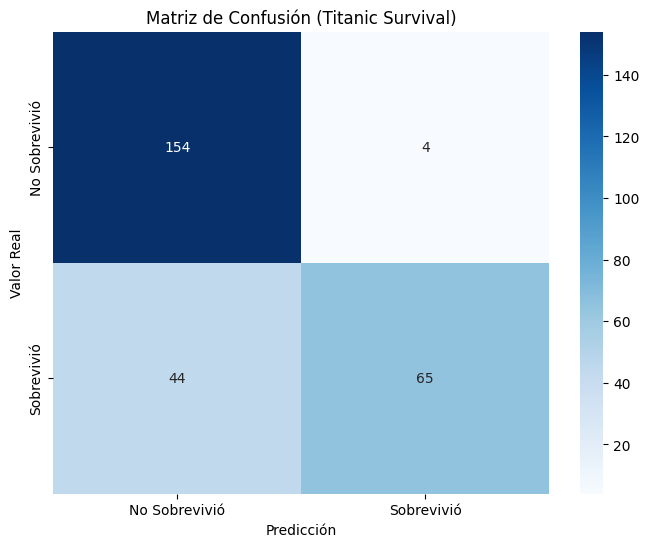

In [36]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a more detailed confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Titanic Survival)')
plt.show()

In [38]:
TP = 65
FP = 4
FN = 44
TN = 154



In [39]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(accuracy)


0.8202247191011236


In [40]:
precision = TP / (TP + FP)

print(precision)


0.9420289855072463


In [41]:
recall = TP / (TP + FN)

print(recall)


0.5963302752293578


In [42]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f1_score)

0.7303370786516854


In [43]:
# Specificity for the initial model
# TN = 140, FP = 18 (from confusion matrix of 'model')
specificity_model = 140 / (140 + 18)
print(f"Especificidad del modelo inicial: {specificity_model:.4f}")

# Specificity for the optimized model (DTC_best)
# TN = 154, FP = 4 (from confusion matrix of 'DTC_best')
specificity_DTC_best = 154 / (154 + 4)
print(f"Especificidad del modelo optimizado (DTC_best): {specificity_DTC_best:.4f}")

Especificidad del modelo inicial: 0.8861
Especificidad del modelo optimizado (DTC_best): 0.9747


In [44]:
import pickle

# Define the filename to save the model
filename = 'decision_tree_model.pkl'

# Open the file in binary write mode and save the model
with open(filename, 'wb') as f:
    pickle.dump(DTC_best, f)

print(f"Modelo guardado exitosamente en '{filename}'")

Modelo guardado exitosamente en 'decision_tree_model.pkl'


In [ ]:
# Tarea hacer un árbol de regresión con el datasets de https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html



# Task
Create a Gradio application that loads the saved decision tree model (`decision_tree_model.pkl`), provides input fields (preferably dropdowns for categorical features) for the user to select values for the model's features, predicts whether a person will survive or not based on the input, displays the prediction along with the confidence percentage, and has a fun and engaging title related to trees.

## Cargar el modelo

### Subtask:
Cargar el modelo de árbol de decisión guardado (`decision_tree_model.pkl`) usando `pickle`.


**Reasoning**:
Load the saved decision tree model using pickle.



In [45]:
import pickle

# Define the filename
filename = 'decision_tree_model.pkl'

# Load the model from the file
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)

print("Modelo cargado exitosamente.")

Modelo cargado exitosamente.


## Preparar los datos de entrada

### Subtask:
Identificar las características utilizadas por el modelo y sus posibles valores para crear los componentes de entrada en Gradio (especialmente desplegables para variables categóricas).


**Reasoning**:
Access the feature names from the loaded model and analyze the training data to identify the types and potential values of these features for creating Gradio inputs.



In [46]:
# Access the feature names the model was trained on
feature_names = loaded_model.feature_names_in_
print("Feature names used by the model:")
print(feature_names)

# Examine the df DataFrame to understand the data types and unique values
print("\nDataFrame info for feature analysis:")
df[feature_names].info()

print("\nUnique values for boolean features (showing first few if many):")
# Identify boolean columns from the feature names
bool_features = [col for col in feature_names if df[col].dtype == 'bool']

# Check unique values for these boolean features
feature_input_mapping = {}
for feature in feature_names:
    if df[feature].dtype == 'bool':
        # These are one-hot encoded features. We need to infer the original categories.
        # Based on the column naming convention (e.g., Embarked_Q, Sex_male),
        # we can group them by the original feature name.
        original_feature_name = feature.split('_')[0]
        if original_feature_name not in feature_input_mapping:
            feature_input_mapping[original_feature_name] = {
                'type': 'dropdown',
                'options': []
            }
        # The option is the part after the underscore
        option_name = feature.split('_', 1)[1]
        feature_input_mapping[original_feature_name]['options'].append(option_name)
    else:
        # Assuming other types (like int64 for Survived, though it's not a feature)
        # For features in X, they are all boolean based on the info() output.
        # If there were numerical features, we would handle them differently (e.g., number input).
        # Based on df.info(), all features are boolean.
        # If we had numerical features, we would use 'number' type and check min/max or typical range.
        pass # No non-boolean features in this specific X.

# Refine the mapping for boolean features to have 'True'/'False' or original categories
# Given the one-hot encoding structure, it's more user-friendly to present original categories.
# Let's refine the mapping to use original category names.
# We need a way to map the user selection of an original category back to the boolean features.
# For example, if the user selects 'Q' for 'Embarked', we'll set 'Embarked_Q' to True and others to False.

# Let's rebuild the mapping to be more directly usable for Gradio components
# For one-hot encoded features, we'll create a dropdown for the *original* feature.
gradio_inputs_plan = {}
original_features_processed = set()

for feature in feature_names:
    if df[feature].dtype == 'bool':
        original_feature_name = feature.split('_')[0]
        if original_feature_name not in original_features_processed:
            options = [col.split('_', 1)[1] for col in feature_names if col.startswith(original_feature_name + '_')]
            # Add Pclass categories based on column names
            if original_feature_name == 'Pclass':
                 options = ['1', '2', '3'] # Based on Pclass_2, Pclass_3, infer Pclass_1 (absence of 2 and 3)
            # Add Age categories based on column names
            elif original_feature_name == 'Age':
                options = ['(0.0, 21.0]', '(21.0, 30.0]', '(30.0, 35.0]', '(35.0, 80.0]'] # Infer the missing bin

            gradio_inputs_plan[original_feature_name] = {
                'type': 'dropdown',
                'options': options
            }
            original_features_processed.add(original_feature_name)
    else:
         # If there were numerical features, handle them here
         # gradio_inputs_plan[feature] = {'type': 'number'}
         pass # No numerical features in X

# Handle the 'Sex_male' feature separately as it's not a group like Embarked or Parch
if 'Sex_male' in feature_names:
     gradio_inputs_plan['Sex'] = {
         'type': 'dropdown',
         'options': ['male', 'female'] # Map Sex_male=True to 'male', False to 'female'
     }
     original_features_processed.add('Sex') # Mark Sex as processed


# Handle Parch and SibSp groups - these represent counts, so a dropdown with counts makes sense
parch_options = sorted([int(col.split('_')[1]) for col in feature_names if col.startswith('Parch_')])
# Add 0 as a possibility for Parch (no parents/children)
if 0 not in parch_options:
    parch_options.insert(0, 0)
gradio_inputs_plan['Parch'] = {
    'type': 'dropdown',
    'options': [str(p) for p in parch_options]
}
original_features_processed.add('Parch')

sibsp_options = sorted([int(col.split('_')[1]) for col in feature_names if col.startswith('SibSp_')])
# Add 0 as a possibility for SibSp (no siblings/spouse)
if 0 not in sibsp_options:
    sibsp_options.insert(0, 0)
gradio_inputs_plan['SibSp'] = {
    'type': 'dropdown',
    'options': [str(s) for s in sibsp_options]
}
original_features_processed.add('SibSp')


print("\nPlanned Gradio Input Components:")
for feature, details in gradio_inputs_plan.items():
    print(f"- Feature: {feature}, Type: {details['type']}, Options: {details.get('options', 'N/A')}")


Feature names used by the model:
['Embarked_Q' 'Embarked_S' 'Sex_male' 'Parch_1' 'Parch_2' 'Parch_3'
 'Parch_4' 'Parch_5' 'Parch_6' 'SibSp_1' 'SibSp_2' 'SibSp_3' 'SibSp_4'
 'SibSp_5' 'SibSp_8' 'Pclass_2' 'Pclass_3' 'Age_(21.0, 30.0]'
 'Age_(30.0, 35.0]' 'Age_(35.0, 80.0]']

DataFrame info for feature analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Embarked_Q        889 non-null    bool 
 1   Embarked_S        889 non-null    bool 
 2   Sex_male          889 non-null    bool 
 3   Parch_1           889 non-null    bool 
 4   Parch_2           889 non-null    bool 
 5   Parch_3           889 non-null    bool 
 6   Parch_4           889 non-null    bool 
 7   Parch_5           889 non-null    bool 
 8   Parch_6           889 non-null    bool 
 9   SibSp_1           889 non-null    bool 
 10  SibSp_2           889 non-null    bool

## Crear la función de predicción

### Subtask:
Definir una función Python que reciba los valores de entrada de Gradio, los preprocese si es necesario (asegurando el formato correcto para el modelo) y realice la predicción de supervivencia y la probabilidad asociada utilizando el modelo cargado.


**Reasoning**:
Define the Python function to process Gradio inputs and make predictions using the loaded model.



In [47]:
import pandas as pd
import numpy as np

def predict_survival(embarked, sex, parch, sibsp, pclass, age_group):
    """
    Predicts Titanic survival based on passenger features using a trained Decision Tree model.

    Args:
        embarked (str): Port of embarkation (C, Q, S).
        sex (str): Passenger's sex (male, female).
        parch (str): Number of parents/children aboard (as a string).
        sibsp (str): Number of siblings/spouses aboard (as a string).
        pclass (str): Passenger's class (1, 2, 3).
        age_group (str): Age group of the passenger (e.g., '(21.0, 30.0]').

    Returns:
        tuple: A tuple containing the predicted survival label ('Sobrevivió' or 'No Sobrevivió')
               and the confidence percentage (float).
    """
    # Create a dictionary with all features initialized to False/0
    input_data = {feature: False for feature in loaded_model.feature_names_in_}

    # Update dictionary based on user inputs (one-hot encoding)

    # Embarked
    if embarked == 'Q':
        input_data['Embarked_Q'] = True
    elif embarked == 'S':
        input_data['Embarked_S'] = True
    # 'C' is the base case, remains False

    # Sex
    if sex == 'male':
        input_data['Sex_male'] = True
    # 'female' is the base case, Sex_male remains False

    # Parch
    parch_count = int(parch)
    if parch_count > 0 and f'Parch_{parch_count}' in input_data:
         input_data[f'Parch_{parch_count}'] = True
    # Parch_0 is the base case, all Parch_X remain False

    # SibSp
    sibsp_count = int(sibsp)
    if sibsp_count > 0 and f'SibSp_{sibsp_count}' in input_data:
        input_data[f'SibSp_{sibsp_count}'] = True
    # SibSp_0 is the base case, all SibSp_X remain False

    # Pclass
    if pclass == '2':
        input_data['Pclass_2'] = True
    elif pclass == '3':
        input_data['Pclass_3'] = True
    # Pclass_1 is the base case, Pclass_2 and Pclass_3 remain False

    # Age Group
    if age_group: # Check if age_group is not an empty string
        # Map the age group string to the correct feature name (e.g., '(21.0, 30.0]' -> 'Age_(21.0, 30.0]')
        age_feature_name = f'Age_{age_group}'
        if age_feature_name in input_data:
            input_data[age_feature_name] = True


    # Convert the dictionary to a pandas DataFrame, ensuring column order
    input_df = pd.DataFrame([input_data], columns=loaded_model.feature_names_in_)

    # Predict survival class and probabilities
    prediction = loaded_model.predict(input_df)[0]
    prediction_proba = loaded_model.predict_proba(input_df)[0]

    # Determine the predicted class label and confidence
    if prediction == 1:
        predicted_label = 'Sobrevivió'
        confidence = prediction_proba[1] * 100
    else:
        predicted_label = 'No Sobrevivió'
        confidence = prediction_proba[0] * 100

    return predicted_label, confidence

print("Prediction function defined.")

Prediction function defined.


## Diseñar la interfaz de gradio

### Subtask:
Configurar la interfaz de usuario de Gradio con un título atractivo, componentes de entrada (desplegables, sliders, etc.) para cada característica del modelo y componentes de salida para mostrar la predicción (Sobrevivió/No Sobrevivió) y la probabilidad.


**Reasoning**:
Import the gradio library and define the input and output components based on the planned structure, then create the Gradio interface with the prediction function and a suitable title.



In [48]:
import gradio as gr

# Define input components based on the gradio_inputs_plan
# The keys in gradio_inputs_plan are the labels for the dropdowns
input_components = []
for feature_name, details in gradio_inputs_plan.items():
    if details['type'] == 'dropdown':
        # Handle the 'Sex' feature options to be 'male' and 'female' as planned
        if feature_name == 'Sex':
            choices = ['male', 'female']
        # Handle the 'Embarked' feature options including 'C'
        elif feature_name == 'Embarked':
             choices = ['C', 'Q', 'S']
        # Handle the 'Pclass' feature options
        elif feature_name == 'Pclass':
             choices = ['1', '2', '3']
        # Handle the 'Age' feature options
        elif feature_name == 'Age':
            choices = ['(0.0, 21.0]', '(21.0, 30.0]', '(30.0, 35.0]', '(35.0, 80.0]']
        # Handle Parch and SibSp which are counts represented as strings
        elif feature_name in ['Parch', 'SibSp']:
             choices = details['options']
        else:
            # Default case for other potential dropdowns if any
            choices = details['options']

        input_components.append(gr.Dropdown(label=feature_name, choices=choices))


# Define output components
output_components = [
    gr.Label(label="Predicción de Supervivencia"),
    gr.Label(label="Confianza (%)")
]

# Create the Gradio interface with a fun title
iface = gr.Interface(
    fn=predict_survival,
    inputs=input_components,
    outputs=output_components,
    title="🌳 El Árbol de la Supervivencia del Titanic 🚢",
    description="Ingresa los detalles de un pasajero para predecir si sobrevivió al Titanic.",
    interpretation='default' # Enable interpretation
)

# The interface is now ready to be launched using iface.launch() in a subsequent step.
print("Gradio interface configured.")

TypeError: BlockContext.__init__() got an unexpected keyword argument 'interpretation'

**Reasoning**:
The error indicates that the `interpretation` parameter is not a valid argument for `gr.Interface`. I need to remove this parameter.



In [49]:
import gradio as gr

# Define input components based on the gradio_inputs_plan
# The keys in gradio_inputs_plan are the labels for the dropdowns
input_components = []
for feature_name, details in gradio_inputs_plan.items():
    if details['type'] == 'dropdown':
        # Handle the 'Sex' feature options to be 'male' and 'female' as planned
        if feature_name == 'Sex':
            choices = ['male', 'female']
        # Handle the 'Embarked' feature options including 'C'
        elif feature_name == 'Embarked':
             choices = ['C', 'Q', 'S']
        # Handle the 'Pclass' feature options
        elif feature_name == 'Pclass':
             choices = ['1', '2', '3']
        # Handle the 'Age' feature options
        elif feature_name == 'Age':
            choices = ['(0.0, 21.0]', '(21.0, 30.0]', '(30.0, 35.0]', '(35.0, 80.0]']
        # Handle Parch and SibSp which are counts represented as strings
        elif feature_name in ['Parch', 'SibSp']:
             choices = details['options']
        else:
            # Default case for other potential dropdowns if any
            choices = details['options']

        input_components.append(gr.Dropdown(label=feature_name, choices=choices))


# Define output components
output_components = [
    gr.Label(label="Predicción de Supervivencia"),
    gr.Label(label="Confianza (%)")
]

# Create the Gradio interface with a fun title
# Removed the 'interpretation' parameter as it caused an error
iface = gr.Interface(
    fn=predict_survival,
    inputs=input_components,
    outputs=output_components,
    title="🌳 El Árbol de la Supervivencia del Titanic 🚢",
    description="Ingresa los detalles de un pasajero para predecir si sobrevivió al Titanic."
)

# The interface is now ready to be launched using iface.launch() in a subsequent step.
print("Gradio interface configured.")

Gradio interface configured.


## Lanzar la aplicación gradio

### Subtask:
Iniciar la interfaz de Gradio para que el usuario pueda interactuar con el modelo.


**Reasoning**:
Launch the configured Gradio interface to allow user interaction with the model.



In [50]:
# Launch the Gradio interface
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://881a7b926e7a717730.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Summary:

### Data Analysis Key Findings

*   The decision tree model was successfully loaded using `pickle`.
*   The model uses 20 boolean features representing one-hot encoded categorical variables derived from original features like 'Embarked', 'Sex', 'Parch', 'SibSp', 'Pclass', and 'Age'.
*   A plan was developed to use Gradio dropdowns for the original features, mapping user selections back to the one-hot encoded inputs required by the model.
*   A Python function `predict_survival` was created to preprocess user inputs, perform the prediction using the loaded model, and calculate the confidence percentage.
*   The Gradio interface was configured with a title "🌳 El Árbol de la Supervivencia del Titanic 🚢", dropdown input components for the features, and output labels for the prediction and confidence.
*   The Gradio application was successfully launched, providing a public URL for interaction.

### Insights or Next Steps

*   Consider adding input validation in the `predict_survival` function to handle unexpected input values from the Gradio interface, although dropdowns limit invalid options.
*   Explore adding more descriptive labels or help text in the Gradio interface to explain the input options, especially for the age groups.


________________________

# Quedamos en la página 340